Solving linerRegression with tensorflow

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
lr = 0.01
training_epochs = 100

Set the fake data for linera regression task

In [4]:
X_train = np.linspace(-1, 1, 101)
y_train = 2 * X_train + np.random.randn(*X_train.shape) * 0.33

sets up the input and output nodes as placeholders because we will be feeding in data from X_train and y_train

In [7]:
tf.__version__

'2.6.0'

In [9]:
class NNModel(tf.keras.Model):

    def __init__(self) -> None:
        super().__init__()
        self.d1 = tf.keras.layers.Dense(4, activation=tf.nn.relu)
        self.d2 = tf.keras.layers.Dense(5, activation=tf.nn.softmax)
        self.dropout = tf.keras.layers.Dropout(0.2)

    # forward pass
    def call(self, inputs, training=False):
        x = self.d1(inputs)
        if training:
            x = self.dropout(x, training=training)
        return self.d2(x)

In [10]:
model = NNModel()

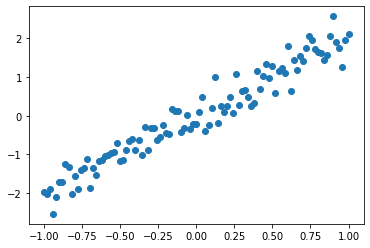

In [12]:
plt.scatter(X_train, y_train)
plt.show()

In [14]:
optimizer = tf.keras.optimizers.SGD(lr)
loss = tf.keras.losses.MeanSquaredError()

In [15]:
model.compile(optimizer=optimizer, loss=loss)

In [16]:
model.fit(X_train, y_train, epochs=training_epochs, verbose=1)

Epoch 1/100
4/4 [==============================] - 2s 22ms/step - loss: 1.5171
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.5172
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.5172
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 1.5171
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.5172
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 1.5172
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.5172
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.5172
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.5171
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.5171
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 1.5172
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 1.5171
Epoch 13/100
4/4 [==============================] - 0s 2ms/s

In [17]:
model.summary()

Model: "nn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  8         
_________________________________________________________________
dense_1 (Dense)              multiple                  25        
_________________________________________________________________
dropout (Dropout)            multiple                  0         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [20]:
test_loss, test_acc = model.evaluate(X_train, y_train)

4/4 [==============================] - 0s 2ms/step - loss: 1.5169


TypeError: cannot unpack non-iterable float object

In [19]:
y_pred = model.predict(X_train)

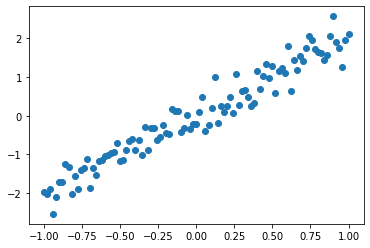

In [23]:
plt.scatter(X_train, y_train)
# plt.scatter(X_train, y_pred)
plt.show()